In [212]:
# -*- coding: utf-8 -*-
"""
Created on Wed Feb  7 11:24:13 2024

@author: mrsag
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

import matplotlib as mpl

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
mpl.rcParams['font.size'] = 12
#mpl.rcParams['font.weight'] = 'bold'
#mpl.rcParams['font.style'] = 'italic'  # Set this to 'italic'
mpl.rcParams['figure.dpi'] = 100  # highres display


In [213]:
@np.vectorize
def f(x):
    coefficients=(0.1,0,-8,10,0)
    y = np.polyval(coefficients, x)*np.sin(x/2)*np.exp(-0.01*x**2)
    return y

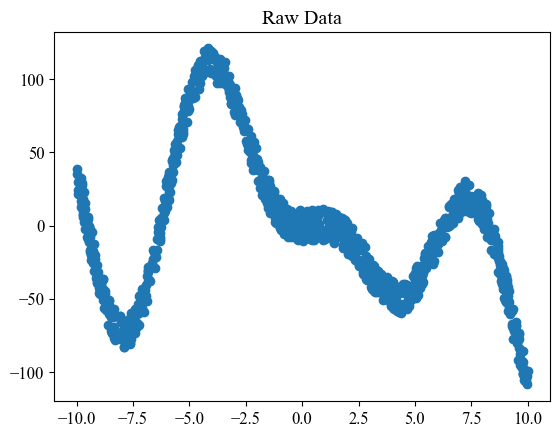

In [214]:
x = np.random.uniform(-10,10,size=1000)
y = f(x)
a = max(np.abs(y))/10
y += np.random.uniform(low=-a, high=a, size=len(x))

plt.scatter(x,y)
plt.title("Raw Data")
plt.show()

In [215]:
train_part = 0.3
maxw = round(train_part*len(x))

x = x[:,np.newaxis]
y = y[:,np.newaxis]

x_train = x[0:maxw]
y_train = y[0:maxw]

x_test  = x[maxw+1:]
y_test  = y[maxw+1:]

In [216]:
def learn_poly(x_train, y_train, x_test, degree):
    model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())

    # Train the model using the training sets
    model.fit(x_train, y_train)

    # Make predictions using the testing set
    y_predict = model.predict(x_test)
    
    # Access the linear regression model within the pipeline
    linear_reg_model = model.named_steps['linearregression']
    coef_predicted   = ((linear_reg_model.coef_).flatten())
    return y_predict, coef_predicted

Predicted coefficients: 0.00000, -0.73315, 4.73541, -3.58677, -0.22772, 0.20798, 0.00370, -0.00421, -0.00003, 0.00004, 0.00000, -0.00000


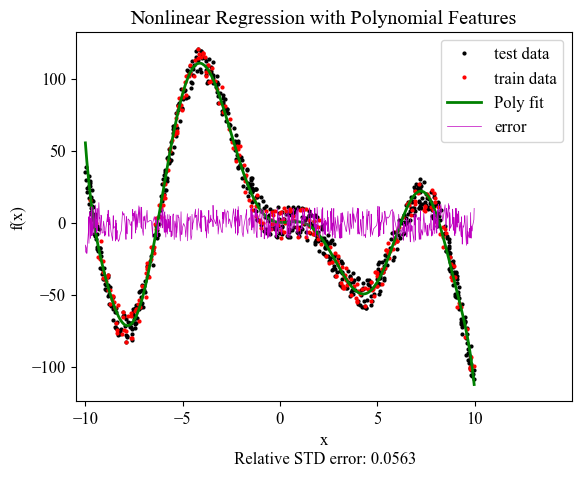

In [217]:
y_predict, coeff = learn_poly(x_train, y_train, x_test, degree=11)

sorted_indices = np.argsort(x_test.flatten())
x_test_sorted = (x_test.flatten())[sorted_indices]
y_test_sorted = (y_test.flatten())[sorted_indices]
y_predict_sorted = (y_predict.flatten())[sorted_indices]

error = (y_test_sorted-y_predict_sorted)
# Format each coefficient to three decimal places
formatted_coefs = ", ".join([f"{coef:.5f}" for coef in coeff])

print(f"Predicted coefficients: {formatted_coefs}")

# Plot outputs
plt.plot(x_test, y_test, 'ko', label='test data', markersize = 2)
plt.plot(x_train,y_train,'ro', label = 'train data', markersize= 2)
plt.plot(x_test_sorted, y_predict_sorted, color='g', linewidth=2, label='Poly fit')
plt.plot(x_test_sorted,error, 'm-', lw=0.5, label = 'error')
plt.xlabel('x'+f"\n Relative STD error: {(np.std(error)/max(y.flatten())):.4f}")
plt.ylabel('f(x)')
plt.xlim(1.05*min(x.flatten()),max(x.flatten())*1.5)
plt.title('Nonlinear Regression with Polynomial Features')
plt.legend()
plt.show()

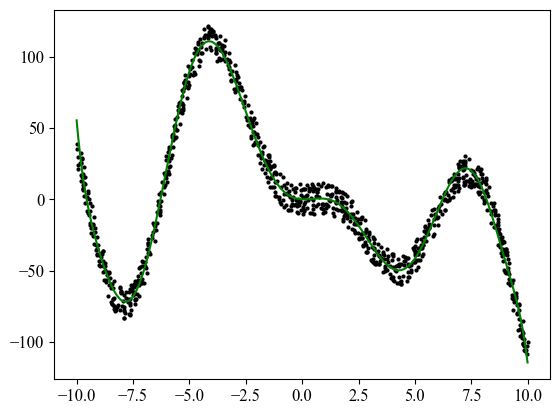

In [218]:
z = np.polyval(tuple(coeff[::-1]),x.flatten())
sorted_indices = np.argsort(x.flatten())

plt.plot(x,y,'ko', markersize = 2)
plt.plot(x[sorted_indices],z[sorted_indices],'g-')
plt.show()